## Inteligência Computacional II - Trabalho 2

Prof. Carlos Eduardo Pedreira  
PESC/COPPE/UFRJ  
Trabalho Prático I  


O Trabalho Prático II visa implementar os exercícios computacionais descritos no Homework #2 disponibilizado em:  
https://work.caltech.edu/homework/hw2.pdf

## Introdução

### Regressão linear [ref.](https://www.dicionariofinanceiro.com/regressao-linear/)

A regressão linear é uma metodologia desenvolvida a partir da estatística e da econometria, para analisar a relação entre variáveis formadas em um dado e seus resultados.

A relação parte de uma variável de interesse (dependente) com outras que a possam influenciar, por exemplo, analisar a venda de um produto relacionada ao crescimento populacional de um país.

Com os resultados obtidos a regressão linear visualiza as maiores tendências que as variáveis analisadas apresentam. A regressão consiste em modelar na estatística, os valores que se quer observar.

Esta regressão é linear quando os acontecimentos observados na função apresentam um formato em linha reta, como na imagem a seguir:

![Regressão Linear](normdist-regression.jpg)

A análise de regressão é mais útil quando apresentada em um diagrama de dispersão, muito utilizados em economia, administração de empresas e indústrias, ou também, os dados de um país.

Os acontecimentos quando não são combinados em forma linear é conhecida como regressão não-linear, e em seus gráficos, a tendência se apresenta em outros formatos.

Regressão linear simples
A regressão linear é simples quando são observadas apenas duas variáveis, normalmente X e Y, sendo que uma é dependente (Y) e será a função de outra que se comporta independente (X).

A regressão linear simples é analisada através da fórmula $y = ax + b$, onde $b$ é o coeficiente linear e $a$ é o coeficiente angular.

Nos casos em que as variáveis são mais do que duas passa a se chamar regressão linear múltipla e a demonstração visual a partir de um gráfico se torna mais complexa.

### Regressão linear para classificação

A diferença quando se usa uma regressão linear para classificação é que assim como no algoritmo [PLA](https://github.com/luciansr/simple-perceptron-pla-algorithm/blob/master/src/simple-perceptron.ipynb) o objetivo é classificar pontos que tem seus valores como $+1$ e $-1$. Para isso teremos que mapear os dados que inicialmente estão no $R_2$ e gerar os valores de $y_n$ com valor $+1$ caso estejam acima da função target, e $-1$ caso estejam abaixo da função target.

## 1. Criando uma função target aleatória

Para começar o experimento, uma função target aleatória será gerada. Essa função será usada como base para geração de nossa base de treinamento e testes. Esta função será gerada como um vetor com ```1 linha``` e ```2 colunas``` já que estamos trabalhando no $R_2$ e o objetivo é gerar uma target function no formato $y = ax + b$ onde o vetor representará $[a, b]$. 

Para gerar um função target aleatória será utilizado o método ```np.random.rand(<dimensions>)``` onde pode-se definir quais as dimensoes da matriz gerada. A função rand da biblioteca ```numpy``` gera números aleatórios entre $[0, 1)$. Para obter-se uma função com valores entre $-1$ e $1$ multiplica-se por $2$ e subtrai-se $1$ para que $[0,1) \to [-1,1)$.

In [347]:
import numpy as np
    
targetFunction = np.random.rand(2)*2 - 1

print('targetFuncion = ' + str(targetFunction))

targetFuncion = [ 0.47691948 -0.3689029 ]


E sendo a reta $y = ax + b$ e a targetFunction = $[a, b]$:

In [348]:
targetFunctionA = targetFunction[0]
targetFunctionB = targetFunction[1]

print('targetFunction A = ' + str(targetFunctionA))
print('targetFunction B = ' + str(targetFunctionB))

targetFunction A = 0.476919483907
targetFunction B = -0.368902901986


Pode-se então visualizar esta target function:

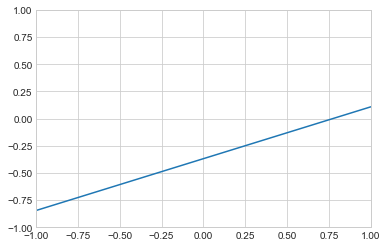

In [349]:
import matplotlib.pyplot as plt
import numpy as np

def xInTargetFunction(x):
    return targetFunctionA*x + targetFunctionB

xValues = np.linspace(-1, 1, 100)
yValues = np.array([])

for x in xValues:
    yValues = np.append(yValues, xInTargetFunction(x))

plt.style.use('seaborn-whitegrid')
plt.plot(xValues, yValues)
axes = plt.gca()
axes.set_xlim([-1,1])
axes.set_ylim([-1,1])
plt.show()


## 2. Gerando Dados a partir da função de geração (target)

Dada a função gerada, pode-se agora gerar pontos aleatórios e classificá-los a partir da mesma para gerar pontos de treinamento. A ideia aqui é gerar o conjunto $X$ matriz $(100,2)$ com pontos aleatórios $[-1,1]$ $x$ $[-1,1]$ (será utilizado o mesmo método ```numpy.random.rand``` utilizado anteriormente), sendo cada $x_n = [x,y]$:

In [350]:
import numpy as np

NUMBER_OF_POINTS = 100

dataX = np.random.rand(NUMBER_OF_POINTS,2)*2 - 1

# mostrando somente primeiros 10 itens
print(str(dataX[:10]) + " \n[...]")

[[-0.74561938  0.78149199]
 [-0.15144173  0.05069513]
 [ 0.43179354  0.16523443]
 [-0.32367427 -0.927555  ]
 [ 0.73513033 -0.93828663]
 [-0.63197967  0.33517052]
 [-0.30591315 -0.75453632]
 [-0.32666891 -0.1898323 ]
 [-0.95862952  0.08061957]
 [ 0.65187155  0.22878186]] 
[...]


Classificá-los usando a função ```classifica``` que retorna $1$ caso o ponto esteja acima da reta da targetFunction, e 0 caso contrário:

In [351]:
def classificaReg(linha, pesos):
  resultado = pesos[0]*linha[0] + pesos[1]
  
  if (linha[1] >= resultado):
    return 1.0
  
  return -1.0

E gerar as labels de resultado $Y$ a partir da classificação de $X$ com a função target.

In [352]:
dataY = np.array([])

for x in dataX:
    dataY = np.append(dataY, classificaReg(x, targetFunction))

# mostrando somente primeiros 10 itens
print(str(dataY[:10]) + " [...]")

[ 1.  1.  1. -1. -1.  1. -1.  1.  1.  1.] [...]


Agora pode-se ver o resultado no gráfico:

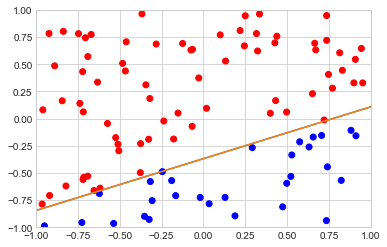

In [353]:
plt.style.use('seaborn-whitegrid')
plt.plot(xValues, yValues)

# cores a ser mostradas
yColors = np.array([])

for y in dataY:
    yColors = np.append(yColors, 'b' if y == -1 else 'r')

plt.plot(xValues, yValues)
plt.scatter(dataX.T[0], dataX.T[1],c=yColors)
axes = plt.gca()
axes.set_xlim([-1,1])
axes.set_ylim([-1,1])
plt.show()

Observe que na verdade estamos observando um gráfico 2D, mas na verdade os pontos vermelhos tem valor $+1$ enquanto os pontos em azul tem valor $-1$.

## 3. Implementando a Regressão Linear

O algoritmo de aprendizado da Regressão é muito simples. Vamos aplicar a fórmula:   

$$w = X^{\dagger}y$$ onde $$X^{\dagger} = (X^TX)^{-1}X^T$$ e $X^{\dagger}$ é a pseudo-inversa de $X$.

Será usada a função ```np.linalg.pinv(<X>)``` que calcula a pseudo-inversa.

Algoritmo:

In [451]:
def regressionFit(X, y):
    # cria com um vetor inicial por causa da funcao vstack
    trainingX = np.array([0,0,0])
    
    for x in X:
        trainingX = np.vstack([trainingX, np.array([x[0], x[1], 1])])
    
    # usa o X treinamento sem considerar a primeira linha
    pseudoInvX = np.linalg.pinv(trainingX[1:])
    return pseudoInvX.dot(y)


Uma outra função que será usada é a função ```regressionPredict(w, x)```: 

In [452]:
def regressionPredict(w, x):
    regressionValue = w.T.dot(np.array([x[0], x[1], 1]))
    return 1.0 if regressionValue >= 0 else -1.0

In [453]:
fittedW = regressionFit(dataX, dataY)

print('fittedW:')
print(fittedW)

fittedW:
[-0.52643457  1.15600334  0.37039235]


  Uma observação que vale a pena ser feita é que a regressão linear não atinge 100% de acertos nos dados de entrada, assim com o PLA. Ou seja, $E_{in}$ não é $0%$. Será utilizada a seguinte função para testar o erro:

In [454]:
def calculaErro(w, X, Y):
    erro = 0
    index = 0
    for x in X:        
        if regressionPredict(w, x) != Y[index]:
            erro += 1
            
        index += 1
    return erro/index

No nosso exemplo o $E_{in}$ foi de:

In [455]:
Ein = calculaErro(fittedW, dataX, dataY)
print('Erro no conjunto de treinamento (Ein) é: ' + str(Ein*100) + '%')

Erro no conjunto de treinamento (Ein) é: 5.0%


Para calcular um $E_{out}$ devemos gerar dados que não foram usados para treinar $w$ e criar um nodo vetor $Y$ a partir da targetFunction e utilizar nossa função com o vetor $w$ gerado anteriormente e calcular o erro. 

Para isso será Utilizada a seguinte função:

In [456]:
def calculaErroForaDaAmostra(w, tempFunction, NUMBER_OF_POINTS):
    tempX = np.random.rand(NUMBER_OF_POINTS,2)*2 - 1    
    tempY = np.array([])

    for x in tempX:
        tempY = np.append(tempY, classificaReg(x, tempFunction))
    
    return calculaErro(w, tempX, tempY)
    

Então para um conjunto de teste de $100$ registros, teríamos um $E_{out}$ de:

In [457]:
Eout = calculaErroForaDaAmostra(fittedW, targetFunction, 100)
print('Erro no conjunto de teste (Eout) é: ' + str(Eout*100) + '%')

Erro no conjunto de teste (Eout) é: 0.0%


## Exercícios

### Regressão Linear


Nestes problemas nós vamos explorar como a Regressão Linear para classificação trabalha. Da mesma maneira com uso do Algoritmo de Aprendizagem Perceptron no Homework #1, você vai criar a sua própria função target (alvo) $f$ e o conjunto de dados $D$. Utilize $d = 2$ para que você possa visualizar o problema, e assuma $X = [-1,1] × [-1,1]$ com probabilidade uniforme selecionando cada $x ∈ X$ . Em cada execução, escolha uma reta aleatória no plano como sua função target $f$ ( faça isso selecionando dois pontos aleatórios, uniformemente distribuídos em $[-1,1] × [-1,1]$ e use a reta que passa entre eles), de forma que a reta mapeie $+1$ por um lado e $-1$ pelo outro. Escolha as entradas $x_n$ do conjunto de dados de pontos aleatórios (uniformemente em $X$), e avalie a função target em cada $x_n$ para encontrar a saída correspondente $y_n$.


### Resolução

Serão utilizadas as funções ```classifica``` e ```fit``` nas questões que é necessário testar usando PLA:

In [512]:
def classifica(row, f):
    soma = np.append(row, 1).dot(f)

    if (soma >= 0.0):
        return 1.0

    return 0.0

def fit(X, Y, w, lr = 1):
    i = 0
    tempW = w
    while True:
        changed = False
        i = i+1
        index = 0
        for x in X:
            pred = classifica(x, tempW)
            exp = 1.0 if Y[index] > 0.0 else 0.0
            #print(pred)
            #print(exp)
            #print(' ')
            if pred != exp:
                changed = True
                tempW = tempW + lr * (exp-pred) * np.append(x, 1)
            index +=1
                
        # shuffle como requisitado no enunciado        
        np.random.shuffle(X)
        if changed == False:
            break

    return tempW, i

Utilizando a função auxiliar:

In [599]:
def classificaReg(linha, f):
  resultado = f[0]*linha[0] + f[1]
  
  if (linha[1] >= resultado):
    return 1.0
  
  return -1.0

def regressionFit(X, y):
    trainingX = np.array([0,0,0])
    
    for x in X:
        trainingX = np.vstack([trainingX, np.array([x[0], x[1], 1])])
        
    pseudoInvX = np.linalg.pinv(trainingX[1:])
    return pseudoInvX.dot(y)


def regressionPredict(w, x):
    regressionValue = w.T.dot(np.array([x[0], x[1], 1]))
    return 1.0 if regressionValue >= 0 else -1.0


# retorna 
#    1. Ein - probabilidade de erro entre y e w^t*x calculada empiricamente 
#       usando <nExperimentos> experimentos dentro do conjunto de treinamento
#    2. Eout - probabilidade de erro entre y e w^t*x calculada empiricamente 
#       usando <nExperimentos> experimentos dentro do conjunto de testes
#
# parametros
#   1. nPontos = Número de pontos gerados para cada experimento
#   2. nExperimentos = número de experimentos executados no cálculo
#
def calculaRegression_e_PLA(nPontos, nExperimentos = 1000):
    Eout = 0.0    
    Ein = 0.0 
    nIter = 0.0;
    
    for i in range(nExperimentos):

        # gera funcao target F entre [-1, 1)
        targetFunctionF = np.random.rand(2)*2 - 1

        # gera N pontos
        innerDataX = np.random.rand(nPontos,2)*2 - 1
        
        innerY = np.array([])

        # gera pontos em y -1 ou +1
        for x in innerDataX:
            innerY = np.append(innerY, classificaReg(x, targetFunctionF))
            
        # fit em w e recebendo numero de iteracoes
        fittedInnerW = regressionFit(innerDataX, innerY)
        
        #w = np.array([0,0,0])
        
        #print(fittedInnerW)
        # fit em w usando PLA com W inicial gerado pela regressão
        #innerIter = 0.0
        fittedPLA_W, innerIter = fit(innerDataX, innerY, fittedInnerW)
        #print(fittedPLA_W, innerIter)
                
        # gera N pontos para teste
        innerTestDataX = np.random.rand(nPontos,2)*2 - 1
        
        # calculando numero de erros do conjunto de treinamento
        errors = 0.0
        for x in innerDataX:
            predicted = regressionPredict(fittedInnerW, x)
            expected =  classificaReg(x, targetFunctionF)
            if predicted != expected:
                errors = errors + 1.0
        
        innerEin = errors / nPontos;
                        
        # calculando numero de erros do conjunto de testes
        errors = 0.0
        for x in innerTestDataX:
            predicted = regressionPredict(fittedInnerW, x)
            expected =  classificaReg(x, targetFunctionF)
            if predicted != expected:
                errors = errors + 1.0
        
        innerEout = errors / nPontos;
        
        # adicionando Ein
        Ein = Ein + innerEin
        # adicionando Eout
        Eout = Eout + innerEout
        # n iteracoes
        nIter = nIter + innerIter;
            
        
    #end for
    Eout = Eout/nExperimentos;
    Ein = Ein/nExperimentos;
    nIter = nIter/nExperimentos;
    
    return Ein, Eout, nIter 

1) Utilize N = 100. Use Regressão  não Linear para encontrar g e avaliar $E_{in}$, a fração de pontos dentro da amostra que foram classificados incorretamente. Repita o experimento 1000 vezes e use o valor médio (guarde as g’s que serão usadas novamente no Problema 2). Qual é o valor médio aproximado de $E_{in}$? (aproximado é a opção que faz a expressão | sua resposta - dada opção | próxima a 0. Use esta definição aqui e sempre).

a) $0$ b) $0.001$ c)**(x)** $0.01$ d) $0.1$ e) $0.5$


2) Agora, gere 1000 novos pontos e os use para estimar o erro fora da amostra $E_{out}$ de g que você fez no Problema 1 (número de pontos classificados incorretamente / número total de pontos fora da amostra). Novamente, execute o experimento 1000 vezes e guarde a média. Qual é o valor médio aproximado de $E_{out}$?

a) $0$ b) $0.001$ c)**(x)** $0.01$ d) $0.1$ e) $0.5$


In [522]:
N100Ein, N100Eout, N100Iter = calculaRegression_e_PLA(100)
print('Ein = ' + str(N100Ein))
print('Eout = ' + str(N100Eout))
print('PLA Iter = ' + str(N100Iter))

Ein = 0.04218000000000003
Eout = 0.052470000000000065
PLA Iter = 402.12415


3) Agora, utilize N = 10. Posteriormente, procurando os pesos usando Regressão Linear, os use como um vetor de pesos inicial para o Algoritmo de Aprendizagem Perceptron. Execute PLA até que convirja para o vetor final de pesos que separe completamente todos os pontos dentro da amostra. Entre as opções abaixo, qual é o valor mais próximo do número médio de iterações (mais de 1000 execuções) que o PLA leva para convergir? (Quando estiver implementando o PLA, escolha um ponto aleatório para o conjunto classificado incorretamente para cada iteração).

a) $1$ b) $15$ c) $300$ **d)(x)** $5000$ e) $10000$


### Regressão Não-Linear

Nestes problemas, nós vamos novamente aplicar Regressão Linear para classificação. Considere a função target:

$f(x_1, x_2) = sign(x^2_1 + x^2_2 − 0.6)$.

Gere um conjunto de treinamento de $N = 1000$ pontos em $X = [-1,1]×[-1,1]$ com probabilidade uniforme escolhendo cada $x ∈ X$ . Gere um ruído simulado lançando o sinal de saída aleatoriamente selecionando $10%$ do subconjunto de treinamento gerado.



**Será utilizada uma versão modificada da anterior:**

In [553]:
def classificaRegNLin(linha):
  resultado = linha[0]**2 + linha[1]**2 - 0.6
  
  if (linha[1] >= resultado):
    return 1.0
  
  return -1.0

def regressionNLinFit(X, y):
    trainingX = np.array([0,0,0])
    
    for x in X:
        trainingX = np.vstack([trainingX, np.array([1, x[0], x[1]])])
        
    pseudoInvX = np.linalg.pinv(trainingX[1:])
    return pseudoInvX.dot(y)


def regressionNLinPredict(w, x):
    regressionValue = w.T.dot(np.array([1, x[0], x[1]]))
    return 1.0 if regressionValue >= 0 else -1.0

def calculaRegressionNLin(nPontos, nExperimentos = 1000, quantidadeRuido = 10):
    Eout = 0.0    
    Ein = 0.0 
    wSum = np.array([0.0,0.0,0.0]);
    
    for i in range(nExperimentos):

        # gera funcao target F entre [-1, 1)
        #targetFunctionF = np.random.rand(2)*2 - 1

        # gera N pontos
        innerDataX = np.random.rand(nPontos,2)*2 - 1
        
        innerY = np.array([])

        # gera pontos em y -1 ou +1
        for x in innerDataX:
            innerY = np.append(innerY, classificaRegNLin(x))
            
        # gerando ruído
        for i in range(quantidadeRuido):
            #random float [0,1)
            random = np.random.rand(1)[0]
            
            randomSignal = 1.0 if random > 0.5 else -1.0
            
            random2 = np.random.rand(1)[0]
            # randomIndex = int [0, nPontos-1]
            randomIndex = int((nPontos)*random2)
            
            innerY[randomIndex] = randomSignal
            
            
        # fit em w e recebendo numero de iteracoes
        fittedInnerW = regressionNLinFit(innerDataX, innerY)
        #print(fittedInnerW)
        wSum += fittedInnerW
    
        # gera N pontos para teste
        innerTestDataX = np.random.rand(nPontos,2)*2 - 1
        
        # calculando numero de erros do conjunto de treinamento
        errors = 0.0
        for x in innerDataX:
            predicted = regressionNLinPredict(fittedInnerW, x)
            expected =  classificaRegNLin(x)
            if predicted != expected:
                errors = errors + 1.0
        
        innerEin = errors / nPontos;
                        
        # calculando numero de erros do conjunto de testes
        errors = 0.0
        for x in innerTestDataX:
            predicted = regressionNLinPredict(fittedInnerW, x)
            expected =  classificaRegNLin(x)
            if predicted != expected:
                errors = errors + 1.0
        
        innerEout = errors / nPontos;
        
        # adicionando Ein
        Ein = Ein + innerEin
        # adicionando Eout
        Eout = Eout + innerEout
            
        
    #end for
    Eout = Eout/nExperimentos;
    Ein = Ein/nExperimentos;
    medianW = wSum/nExperimentos
    
    return Ein, Eout, medianW 

4) Execute a Regressão Linear sem transformação usando o vetor de atributos:

$(1, x_1, x_2)$, 

para encontrar o peso **w**. Qual é o valor aproximado de classificação do erro
$E_{in}$ dentro da amostra? (Execute o experimento 100 vezes e use o valor médio de $E_{in}$ para reduzir a variação nos seus resultados.)

a) $0$  b) $0.1$ **c) (x)** $0.3$ d) $0.5$ e) $0.8$


In [605]:
Ein, Eout, midW = calculaRegressionNLin(1000, 100, 10)
print('Ein = ' + str(Ein))
print('Eout = ' + str(Eout))
print('Median W = ' + str(midW))

Ein = 0.05178
Eout = 0.055559999999999984
Median W = [  7.89883015e-01   2.91855715e-03   1.18256340e+00  -1.11711349e-03
  -1.26756896e+00  -7.88597974e-01]


In [595]:
def classificaRegNLin(linha):
  resultado = linha[0]**2 + linha[1]**2 - 0.6
  
  if (linha[1] >= resultado):
    return 1.0
  
  return -1.0

def regressionNLinFit(X, y):
    trainingX = np.array([0,0,0,0,0,0])
    
    for x in X:
        trainingX = np.vstack([trainingX, np.array([1, x[0], x[1], x[0]*x[1], x[0]**2, x[1]**2])])
        
    pseudoInvX = np.linalg.pinv(trainingX[1:])
    return pseudoInvX.dot(y)


def regressionNLinPredict(w, x):
    regressionValue = w.T.dot(np.array([1, x[0], x[1], x[0]*x[1], x[0]**2, x[1]**2]))
    return 1.0 if regressionValue >= 0 else -1.0

def calculaRegressionNLin(nPontos, nExperimentos = 1000, quantidadeRuido = 10):
    Eout = 0.0    
    Ein = 0.0 
    wSum = np.array([0.0,0.0,0.0,0.0,0.0,0.0]);
    
    for i in range(nExperimentos):

        # gera funcao target F entre [-1, 1)
        #targetFunctionF = np.random.rand(2)*2 - 1

        # gera N pontos
        innerDataX = np.random.rand(nPontos,2)*2 - 1
        
        innerY = np.array([])

        # gera pontos em y -1 ou +1
        for x in innerDataX:
            innerY = np.append(innerY, classificaRegNLin(x))
            
        # gerando ruído
        for i in range(quantidadeRuido):
            #random float [0,1)
            random = np.random.rand(1)[0]
            
            randomSignal = 1.0 if random > 0.5 else -1.0
            
            random2 = np.random.rand(1)[0]
            # randomIndex = int [0, nPontos-1]
            randomIndex = int((nPontos)*random2)
            
            innerY[randomIndex] = randomSignal
            
            
        # fit em w e recebendo numero de iteracoes
        fittedInnerW = regressionNLinFit(innerDataX, innerY)
        #print(fittedInnerW)
        
    
        # gera N pontos para teste
        innerTestDataX = np.random.rand(nPontos,2)*2 - 1
        
        # calculando numero de erros do conjunto de treinamento
        errors = 0.0
        for x in innerDataX:
            predicted = regressionNLinPredict(fittedInnerW, x)
            expected =  classificaRegNLin(x)
            if predicted != expected:
                errors = errors + 1.0
        
        innerEin = errors / nPontos;
                        
        # calculando numero de erros do conjunto de testes
        errors = 0.0
        for x in innerTestDataX:
            predicted = regressionNLinPredict(fittedInnerW, x)
            expected =  classificaRegNLin(x)
            if predicted != expected:
                errors = errors + 1.0
        
        innerEout = errors / nPontos;
        
        # adicionando Ein
        Ein = Ein + innerEin
        # adicionando Eout
        Eout = Eout + innerEout
        # adicionando w
        wSum = wSum + fittedInnerW
            
        
    #end for
    Eout = Eout/nExperimentos;
    Ein = Ein/nExperimentos;
    medianW = wSum/nExperimentos
    
    return Ein, Eout, medianW 

5) Agora, transforme os N = 1000 dados de treinamento seguindo o vetor de
atributos não-linear:

$(1, x_1, x_2, x_1 x_2, x^2_1, x^2_2)$.


Encontre o vetor $w_e$ que corresponde a solução da regressão linear. Quais das hipóteses a seguir é a mais próxima que você encontrou? Neste caso, próximo significa o valor que mais entra em acordo com sua hipótese (existe uma alta probabilidade de estar acordando com um ponto aleatoriamente selecionado). Em média algumas execuções serão necessárias para assegurar uma resposta estável.

a) $g(x_1, x_2) = sign( -1 - 0.05x_1 + 0.08x_2 + 0.13x_1 x_2 + 1.5x^2_1 + 1.5x^2_2)$  
b) $g(x_1, x_2) = sign( -1 - 0.05x_1 + 0.08x_2 + 0.13x_1 x_2 + 1.5x^2_1 + 15x^2_2)$  
c) $g(x_1, x_2) = sign( -1 - 0.05x_1 + 0.08x_2 + 0.13x_1 x_2 + 15x^2_1 + 1.5x^2_2)  $  
d) $g(x_1, x_2) = sign( -1 - 1.5x_1 + 0.08x_2 + 0.13x_1 x_2 + 0.05x^2_1 + 0.05x^2_2)  $  
e) $g(x_1, x_2) = sign( -1 - 0.05x_1 + 0.08x_2 + 1.5x_1 x_2 + 0.15x^2_1 + 0.15x^2_2)  $  
f) $Nenhuma$ **(x)**

6) Qual o valor mais próximo do erro de classificação fora da amostra $E_{out}$ de sua hipótese no Problema 5? (Estime isso gerando um novo conjunto de 1000 pontos e adicione ruído, como antes. Em média 1000 execuções reduzem a variação em seus resultados).

a) $0$ **b)(x)** $0.1$ c) $0.3$ d) $0.5$ e) $0.8$


In [598]:
Ein, Eout, midW = calculaRegressionNLin(100, 100, 1)
print('Ein = ' + str(Ein))
print('Eout = ' + str(Eout))
print('Median W = ' + str(midW))

Ein = 0.047099999999999975
Eout = 0.0681
Median W = [ 0.77680229  0.00969515  1.21222684 -0.01438753 -1.23245675 -0.77486688]


## Conclusão

   Comparando com a implementação de um PLA, tem se a impressão que a implementação de uma regressão linear (ou logística) é um pouco mais complexa. Entretanto o tempo de execução parece ser menor quando comparado ao PLA. Uma contra-partida também da regressão linear é que existe a possibilidade de ocorrer Erros mesmo dentro dos dados de treinamento. 
   
   Observou-se que a regressão linear pode ser bastante útil no aprendizado de funções target, porém as vezes é necessário fazer transformações com o dado de entrada para que esta seja eficiente. Essas transformações nem sempre são triviais e pode ser que sejam necessários testes para que se utilize a transformação mais apropriada dependendo da função target.
   
   Similarmente ao PLA, quanto maior $N$, menor a probabilidade de que $g(x_i) \neq f(x_i)$ diminuindo assim tanto $E_{in}$ quanto $E_{out}$.